In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import spearmanr

In [2]:
# Make global settings for the figures.
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
mpl.rcParams['pdf.fonttype'] = 42
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')
# File Paths
save_path = '../figures/'
# data_path = "../data_files/data.xlsx"
data_path = "../data_files/"


In [3]:
# import data into a pandas dataframe.
data = pd.read_excel(f'{data_path}data.xlsx', sheet_name="covariation")
data.head(3)

,Locality,Sample,d13C,d34S,old_CAS,d18O,Sr,Mn,Mn_Sr,TIC,CAS_conc,TS
0,Qiakong,Q22,-2.28,31.839221,431.0,16.588986,831.1,421.8,0.507520,83.10,473.0,15.082950
1,Qiakong,Q24,-2.40,NaN,NaN,NaN,661.5,888.6,1.343311,88.64,NaN,NaN
2,Qiakong,Q25,-2.39,29.483801,285.0,15.319626,570.0,852.5,1.495614,NaN,133.0,6.393089


In [4]:
# summary = data.groupby('Locality').describe()
# summary
d34S = data.d34S
d18O = data.d18O
corg = data.d13C
cas_conc = data.CAS_conc
cas_conc_inv = 1/cas_conc
TIC = data.TIC
Mn = data.Mn
Mn_Sr = data.Mn_Sr

In [5]:
label_d13C = r'$\delta^{13}C_{carb}\;(‰\;VPDB)$'
label_d34S = r'$\delta^{34}S_{CAS}\;(‰\;VCDT)$'
label_d18O = r'$\delta^{18}O_{CAS}\;(‰\;SMOW)$'
label_conc_inv = r'$1/[CAS]\;(ppm^{-1})$'
label_conc = r'$CAS\;(ppm)$'
label_Mn = 'Mn (ppm)'
label_MnSr = 'Mn/Sr'
label_pyr = r'$\delta^{34}S_{pyr}\;(‰\;VCDT)$'
label_TIC = f'Carbonate content (%)'

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


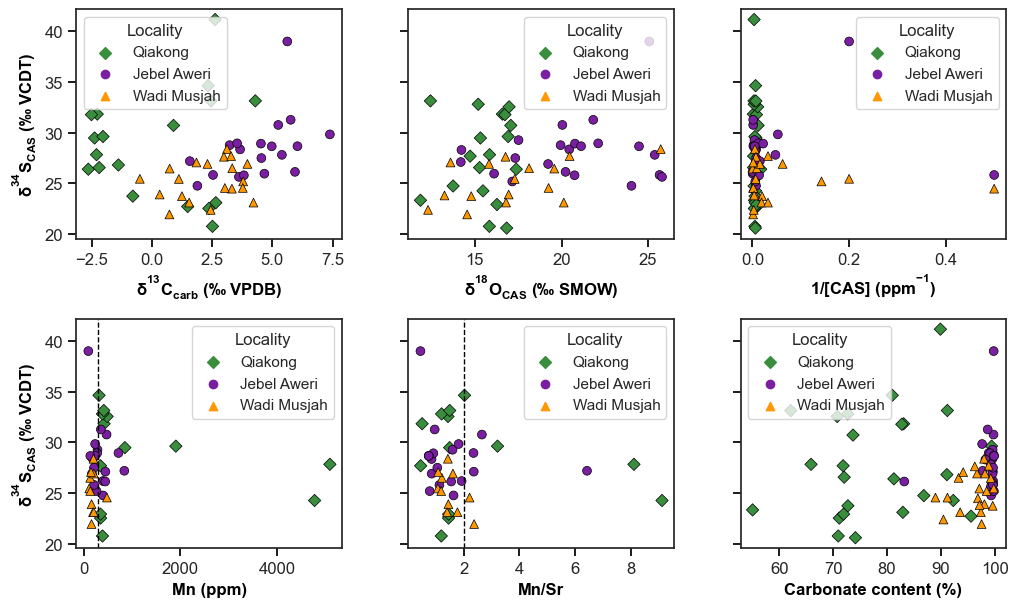

In [6]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(12, 7),  # constrained_layout=True,
                         ncols=3, nrows=2, sharey=True)
((ax0, ax1, ax2,), (ax3, ax4, ax5)) = axes

fig.subplots_adjust(wspace=0.25, hspace = 0.35)
axes_ = [ax0,ax1,ax2,ax3, ax4, ax5]
y_axis = [d34S]*6
x_axis = [corg,d18O,cas_conc_inv, Mn, Mn_Sr, TIC]
# colors = ["#563C5C", "#DE3163", "#B8860B"]
colors = ['#388E3C', '#7B1FA2', '#FF9800', ]
markers = ['D', 'o', '^']
x_label = [label_d13C, label_d18O, label_conc_inv, label_Mn, label_MnSr, label_TIC]
y_label = label_d34S

for i in range(len(axes_)):
    sns.scatterplot(data=data, x= x_axis[i], y=y_axis[i], ax=axes_[i],
                    color='black', edgecolor='black', legend=True,
                        s=40, hue='Locality', palette=colors, alpha=1,
                        style='Locality', markers=markers,)
    axes_[i].tick_params(labelsize=12, color='black')
    axes_[i].set_xlabel(x_label[i], fontsize=12,
                      color='black', fontweight='bold')
    axes_[i].set_ylabel(y_label, fontsize=12,
                      color='black', fontweight='bold')

ax4.axvline(x=2, linewidth=1, color='black', linestyle='--')  
ax3.axvline(x=300, linewidth=1, color='black', linestyle='--')  
plt.savefig(f"{save_path}crossplots.pdf", dpi=600)

In [7]:
cas_conc_inv.idxmax() #checks the index of the row with the maximum value.
(Mn_Sr>2).sum(), Mn_Sr.count() # check the number of samples with Mn/Sr > 2, count how many samples have Mn/Sr values.

(12, 56)

In [8]:
# Group the data by locality
grouped = data.groupby('Locality')

# Loop over the groups and calculate the correlation coefficient and p-value
for name, group in grouped:
    c_org = group['d13C']
    d34S = group['d34S']
    cas_conc = group['CAS_conc']
    d18O = group['d18O']

    Ccorr, Cp_value = spearmanr(c_org, d34S, nan_policy='omit')
    Ocorr, Op_value = spearmanr(d18O, d34S, nan_policy='omit')
    cas_corr, cas_p_value = spearmanr(cas_conc, d34S, nan_policy='omit')

    print(f"Locality: {name} - rho_corg: {Ccorr:.2f}, p-value: {Cp_value:.2f}")
    print(f"Locality: {name} - rho_d18O: {Ocorr:.2f}, p-value: {Op_value:.2f}")
    print(f"Locality: {name} - rho_cas_conc: {cas_corr:.2f}, p-value: {cas_p_value:.2f}")


Locality: Jebel Aweri - rho_corg: 0.51, p-value: 0.03
Locality: Jebel Aweri - rho_d18O: 0.06, p-value: 0.80
Locality: Jebel Aweri - rho_cas_conc: 0.03, p-value: 0.88
Locality: Qiakong - rho_corg: 0.05, p-value: 0.85
Locality: Qiakong - rho_d18O: 0.06, p-value: 0.81
Locality: Qiakong - rho_cas_conc: 0.10, p-value: 0.62
Locality: Wadi Musjah - rho_corg: 0.18, p-value: 0.45
Locality: Wadi Musjah - rho_d18O: 0.44, p-value: 0.08
Locality: Wadi Musjah - rho_cas_conc: -0.10, p-value: 0.67


In [9]:
df = pd.read_excel(f'{data_path}all_cas.xlsx', sheet_name='All')
df.head(3)

,Lab_nos,TS,d34S,sample,locality,d18O,CAS,adjusted_CAS
0,OL 011,5.298111,25.025062,C28,JA,13.249849,312.426935,120.471067
1,OL 011,5.137750,27.065948,C28,JA,NaN,NaN,NaN
2,OL 011,7.745376,26.611000,C28,JA,NaN,NaN,NaN


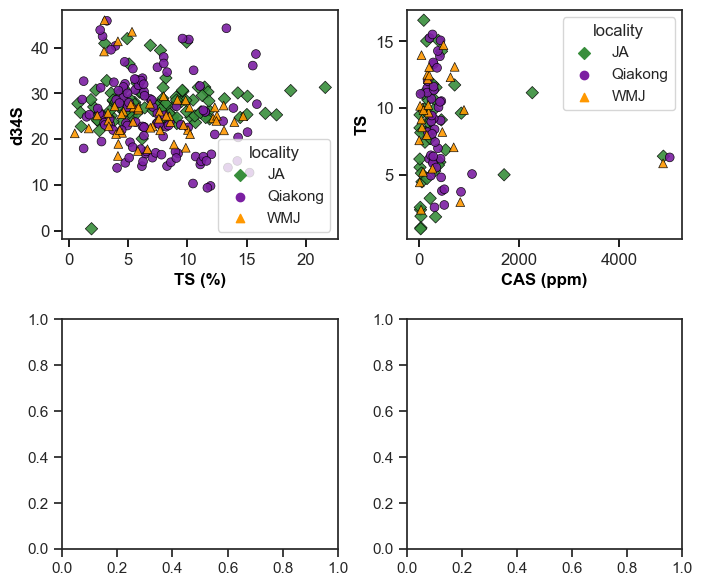

In [10]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(8, 7),  # constrained_layout=True,
                         ncols=2, nrows=2, sharey=False)
((ax0, ax1), (ax2, ax3)) = axes

fig.subplots_adjust(wspace=0.25, hspace=0.35)
axes_ = [ax0, ax1]
y_axis = [df.d34S, df.TS]
x_axis = [df.TS, df.CAS]

x_label = ['TS (%)', 'CAS (ppm)']
y_label = ['d34S', 'TS']
for i in range(len(axes_)):
    sns.scatterplot(data=df, x=x_axis[i], y=y_axis[i], ax=axes_[i],
                    color='black', edgecolor='black', legend=True,
                    s=40, hue='locality', palette=colors, alpha=0.9,
                    style='locality', markers=markers,)
    axes_[i].tick_params(labelsize=12, color='black')
    axes_[i].set_xlabel(x_label[i], fontsize=12,
                        color='black', fontweight='bold')
    axes_[i].set_ylabel(y_label[i], fontsize=12,
                        color='black', fontweight='bold')


In [11]:
# Group the data by locality
grouped = df.groupby('locality')

# Loop over the groups and calculate the correlation coefficient and p-value
for name, group in grouped:
    d34S = group['d34S']
    cas_conc = group['CAS']
    TS = group['TS']

    Scorr, Sp_value = spearmanr(TS, d34S, nan_policy='omit')
    conccorr, concp_value = spearmanr(TS, cas_conc, nan_policy='omit')

    print(f"Locality: {name} - rho_d34S: {Scorr:.2f}, p-value: {Sp_value:.2f}")
    print(f"Locality: {name} - rho_conc: {conccorr:.2f}, p-value: {concp_value:.2f}")


Locality: JA - rho_d34S: 0.10, p-value: 0.33
Locality: JA - rho_conc: 0.31, p-value: 0.03
Locality: Qiakong - rho_d34S: -0.27, p-value: 0.00
Locality: Qiakong - rho_conc: -0.34, p-value: 0.02
Locality: WMJ - rho_d34S: -0.04, p-value: 0.80
Locality: WMJ - rho_conc: 0.14, p-value: 0.49


# Box plots

In [12]:
box = pd.read_excel(f'{data_path}lit_data.xlsx', sheet_name='combined')
box.head(3)

,Locality,Author,Stage,height,d34S,d13C,CAS,d34Spyr,d18Ocas,environment,Basin
0,Mineral Mountains,"Thomazo et al., 2019",Smithian,35.2,24.2,NaN,54.0,NaN,NaN,shallow marine,Sonoma foreland basin
1,Mineral Mountains,"Thomazo et al., 2019",Smithian,56,19.5,NaN,24.0,NaN,NaN,shallow marine,Sonoma foreland basin
2,Mineral Mountains,"Thomazo et al., 2019",Smithian,61.2,19.6,NaN,28.0,NaN,NaN,shallow marine,Sonoma foreland basin


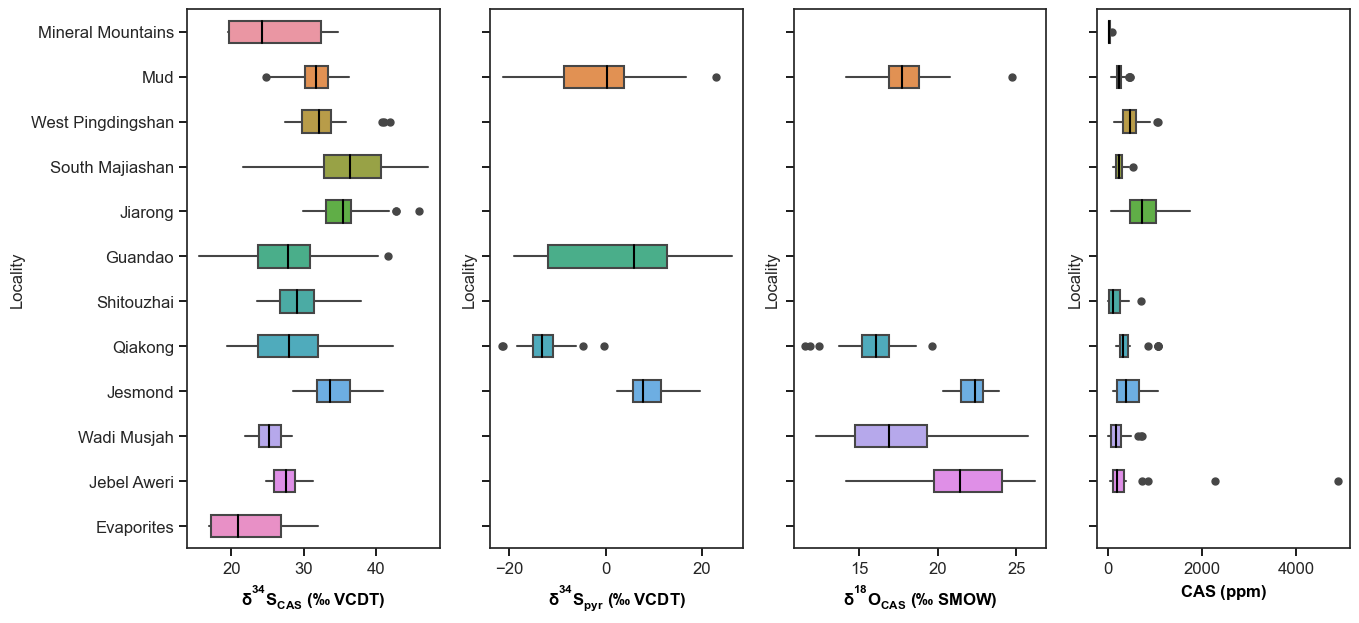

In [13]:
# Create figure landscape mode
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(15, 7), sharey=True)
plot_axes = [ax0, ax1, ax2, ax3]
plot_data = ["d34S", "d34Spyr", "d18Ocas", "CAS"]
labels = [label_d34S, label_pyr, label_d18O,label_conc]
font_size = 12

for i in range(len(plot_axes)):
    sns.boxplot(y='Locality', x=plot_data[i], data=box, ax=plot_axes[i],
                medianprops={"color": "black"}, flierprops={"marker": "o"},
                width=0.5, showcaps=False)
    plot_axes[i].set_xlabel(labels[i], size=font_size,
                            c="black", fontweight="bold")
    plot_axes[i].set_ylabel("Locality", size=font_size)
    plot_axes[i].tick_params(labelsize=font_size, color="black")
    # plot_axes[i].minorticks_on()

plt.savefig(f'{save_path}boxplots.png', dpi=600)
